<a href="https://colab.research.google.com/github/shimo23333/generative_ai/blob/main/AI%E6%9C%9F%E6%9C%AB_0603%E8%B7%A8%E6%96%87%E5%8C%96%E8%89%B2%E5%BD%A9%E8%AA%9E%E6%84%8F%E6%AF%94%E8%BC%83_CLIP%E4%B8%AD%E8%AA%9E%E8%A8%80%E5%B0%8D%E8%89%B2%E5%BD%A9%E7%90%86%E8%A7%A3%E7%9A%84%E5%B7%AE%E7%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1:ÂÆâË£ù
!pip install -q git+https://github.com/openai/CLIP.git #ÂæûGitHubÂÆâË£ùOpenAIÁöÑCLIP
!pip install -q scikit-image #ËôïÁêÜÂΩ±ÂÉè
!pip install -q opencv-python #ÂΩ±ÂÉèËôïÁêÜÂ∑•ÂÖ∑(OpenCV)
!pip install -q diffusers transformers accelerate invisible-watermark safetensors #ÁÇ∫‰∫Ü‰ΩøÁî®StableDiffusion
!pip install -q ipywidgets
!pip install -q sentencepiece sacremoses #ÁøªË≠ØÊ®°Âûã
!apt-get -y install fonts-noto-cjk #ÂòóË©¶

  Preparing metadata (setup.py) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
#2:ÂåØÂÖ•
import torch
import clip #ËΩâÊàêÂêëÈáè
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans #Áî®‰æÜÊâæÂúñÁâáË£°ÊúÄ‰∏ªË¶ÅÁöÑÂπæÂÄãÈ°èËâ≤
from skimage.color import rgb2lab #ÊääÂúñÁâáÂæû RGB È°èËâ≤ËΩâÊàê LAB È°èËâ≤Á©∫ÈñìÁöÑÂ∑•ÂÖ∑
import cv2
from diffusers import StableDiffusionPipeline #tableDiffusion
import os
from sklearn.metrics.pairwise import cosine_similarity #ÊØîÊñáÂ≠óËàáÂúñÂÉèÁöÑË™ûÊÑèÊòØ‰∏çÊòØÊé•Ëøë?
from tqdm.notebook import tqdm
import time
import matplotlib.font_manager as fm
from transformers import pipeline as hf_pipeline
import re #ÁîüÊàêconcept_name

print("2:ÂáΩÂºèÂ∫´ÂåØÂÖ•ÂÆåÊàê„ÄÇ")

2:ÂáΩÂºèÂ∫´ÂåØÂÖ•ÂÆåÊàê„ÄÇ


In [ ]:
#ÈÄôÊòØ‰∏ÄÂÄãÁî®‰æÜË®≠ÂÆö„ÄåÊï¥ÂÄãÂ∞àÊ°àÁí∞Â¢É„ÄçÁöÑÈ°ûÂà•ÔºåËá™ÂãïÊ™¢Êü•ÊòØ‰∏çÊòØËÉΩÁî®GPU„ÄÅË®≠ÂÆöÂ•ΩÁï´ÂúñÁî®ÁöÑ‰∏≠ÊñáÂ≠óÈ´îÔºåÂêåÊôÇÁ¢∫‰øùÂúñÂÉèË¶ÅÂ≠òÁöÑË≥áÊñôÂ§æÂ∑≤Á∂ìÂª∫Á´ãÂ•Ω„ÄÇ
#ÂéüÊú¨ÊòØaiÁîüÊàêÁöÑ‰ΩÜÂ∑≤Á∂ìÈÅéÊàëÁöÑÁêÜËß£ËàáÊï¥ÁêÜ
class ConfigManager:
    def __init__(self, font_path_cjk='/usr/share/fonts/opentype/noto/NotoSansCJKjp-Regular.otf',
                 images_out_dir="project_outputs_final_v4_oop_hf"):
        self.device = self._get_device()
        self.font_path_cjk = font_path_cjk
        self.images_out_dir = images_out_dir
        self._setup_matplotlib_font()
        self._setup_output_directory()
        self.hf_device_id = 0 if self.device == "cuda" else -1

    def _get_device(self):
        device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"4:Êú¨Ê¨°ÈÅãË°åÁöÑË®àÁÆóË®≠ÂÇôÊòØ: {device}")
        if device == "cpu":
            print("Ë≠¶ÂëäÔºöÊú™‰ΩøÁî®GPUÔºÅÈÅãË°åÂ§ßÂûãAIÊ®°ÂûãÊúÉÈùûÂ∏∏ÊÖ¢„ÄÇ")
        return device

    def _setup_matplotlib_font(self):
        print("3:Ê≠£Âú®Ë®≠ÂÆö Matplotlib CJK Â≠óÈ´î...")
        if os.path.exists(self.font_path_cjk):
            try:
                fm.fontManager.addfont(self.font_path_cjk)
                prop = fm.FontProperties(fname=self.font_path_cjk)
                font_name = prop.get_name()
                plt.rcParams['font.family'] = font_name
                plt.rcParams['axes.unicode_minus'] = False
                print(f"  Â∑≤ÊàêÂäüË®≠ÂÆö CJK Â≠óÈ´îÁÇ∫: {font_name}")
            except Exception as e:
                print(f"  Ë®≠ÂÆöÂ≠óÈ´î '{self.font_path_cjk}' ÊôÇÁôºÁîüÈåØË™§: {e}. ÈÄÄÂà∞ÈÄöÁî®ÂàóË°®„ÄÇ")
                plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'SimHei', 'DejaVu Sans', 'sans-serif']
        else:
            print(f"  ÊåáÂÆöÁöÑ CJK Â≠óÈ´îÊñá‰ª∂Ë∑ØÂæë‰∏çÂ≠òÂú®: {self.font_path_cjk}. ÈÄÄÂà∞ÈÄöÁî®ÂàóË°®„ÄÇ")
            plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'SimHei', 'DejaVu Sans', 'sans-serif']
        plt.rcParams['axes.unicode_minus'] = False
        print("3:Matplotlib CJK Â≠óÈ´îË®≠ÂÆöÂÆåÁï¢„ÄÇ")

    def _setup_output_directory(self):
        if not os.path.exists(self.images_out_dir):
            os.makedirs(self.images_out_dir)
            print(f"  Â∑≤Âª∫Á´ãÂúñÂÉèÂÑ≤Â≠òÁõÆÈåÑ: {self.images_out_dir}")

In [ ]:
#ÈÄôÂÄãÈ°ûÂà•ÊòØÁî®‰æÜËôïÁêÜ„ÄåÂêÑÁ®ÆÊ®°ÂûãÁöÑËºâÂÖ•ËàáÁÆ°ÁêÜ„ÄçÁöÑÔºåÂπ´ÊàëÊää‰∏âÁ®ÆÈáçË¶ÅÁöÑÊ®°ÂûãÊ∫ñÂÇôÂ•ΩÔºåCLIP„ÄÅStable Diffusion„ÄÅÁøªË≠ØÊ®°Âûã
#ÂéüÊú¨ÊòØaiÁîüÊàêÁöÑ‰ΩÜÂ∑≤Á∂ìÈÅéÊàëÁöÑÁêÜËß£ËàáÊï¥ÁêÜÔºå‰∏¶‰∏î‰πüËá™Â∑±Êâæ‰∫ÜÊáâË©≤ÂèØË°åÁöÑÊ®°Âûã

class ModelManager:
    def __init__(self, device, hf_device_id):
        self.device = device
        self.hf_device_id = hf_device_id
        self.clip_model = None
        self.clip_preprocess = None
        self.sd_pipeline = None
        self.translation_pipelines = {}

    def load_clip_model(self, model_name="ViT-B/32"):
        print(f"5:Ê∫ñÂÇôËºâÂÖ• CLIP Ê®°Âûã ({model_name})...")
        if self.device == "cuda":
            try:
                self.clip_model, self.clip_preprocess = clip.load(model_name, device=self.device)
                self.clip_model.eval()
                print(f"  CLIP Ê®°Âûã ({model_name}) Â∑≤ÊàêÂäüËºâÂÖ•Âà∞ {self.device}ÔºÅ")
                torch.cuda.empty_cache()
            except Exception as e:
                print(f"  ËºâÂÖ•CLIPÊ®°ÂûãÊôÇÁôºÁîüÈåØË™§: {e}")
                self.clip_model, self.clip_preprocess = None, None
        else:
            print(f"  Êú™ÂØ¶ÈöõËºâÂÖ•CLIPÊ®°ÂûãÔºåÂõ†ÁÇ∫Áï∂ÂâçÈÅãÁÆóË®≠ÂÇôÊòØ {self.device}„ÄÇ")
        return self.clip_model, self.clip_preprocess

    def load_sd_model(self, model_id="runwayml/stable-diffusion-v1-5"):
        print(f"6:Ê∫ñÂÇôËºâÂÖ• Stable Diffusion Ê®°Âûã ({model_id})...")
        if self.device == "cuda":
            try:
                self.sd_pipeline = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
                self.sd_pipeline = self.sd_pipeline.to(self.device)
                print(f"  Stable Diffusion Ê®°Âûã ({model_id}) Â∑≤ÊàêÂäüËºâÂÖ•Âà∞ {self.device}ÔºÅ")
                torch.cuda.empty_cache()
            except Exception as e:
                print(f"  ËºâÂÖ•Stable DiffusionÊ®°ÂûãÊôÇÁôºÁîüÈåØË™§: {e}")
                self.sd_pipeline = None
        else:
            print(f"  Êú™ÂØ¶ÈöõËºâÂÖ•Stable DiffusionÊ®°ÂûãÔºåÂõ†ÁÇ∫Áï∂ÂâçÈÅãÁÆóË®≠ÂÇôÊòØ {self.device}„ÄÇ")
        return self.sd_pipeline

    def init_translation_models(self, target_languages=['en', 'ja', 'ko']):
        print("7:Ê≠£Âú®ÂàùÂßãÂåñ Hugging Face ÁøªË≠ØÊ®°Âûã...")
        model_map = {
            'en': 'Helsinki-NLP/opus-mt-zh-en',
            'ja': 'Helsinki-NLP/opus-mt-tc-big-zh-ja', # Á∂≤Ë∑Ø‰∏äËá™Â∑±ÊâæÂà∞ÁöÑÊ®°Âûã
            'ko': 'Helsinki-NLP/opus-mt-tc-big-zh-ja'  # Á∂≤Ë∑Ø‰∏äËá™Â∑±ÊâæÂà∞ÁöÑÊ®°Âûã
        }
        loaded_any_model = False
        for lang_code in target_languages:
            if lang_code in model_map:
                model_name = model_map[lang_code]
                try:
                    print(f"  ËºâÂÖ•ÁøªË≠ØÊ®°Âûã for zh -> {lang_code} ({model_name})...")
                    translator = hf_pipeline(f"translation_zh_to_{lang_code}", # ‰ªªÂãôÂêçÂèØËÉΩÈúÄË¶ÅË™øÊï¥
                                          model=model_name,
                                          device=self.hf_device_id)
                    self.translation_pipelines[lang_code] = translator
                    print(f"    ÁøªË≠ØÊ®°Âûã for zh -> {lang_code} ({model_name}) ËºâÂÖ•ÊàêÂäü„ÄÇ")
                    loaded_any_model = True
                except Exception as e:
                    print(f"    ËºâÂÖ•ÁøªË≠ØÊ®°Âûã for zh -> {lang_code} ({model_name}) Â§±Êïó: {e}")
                    self.translation_pipelines[lang_code] = None
            else:
                print(f"  Êú™ÊâæÂà∞ÈáùÂ∞ç zh -> {lang_code} ÁöÑÈ†êÂÆöÁæ©ÁøªË≠ØÊ®°Âûã„ÄÇ")
        if not loaded_any_model:
            print("Ë≠¶Âëä: Êú™ËÉΩÊàêÂäüËºâÂÖ•‰ªª‰ΩïHugging FaceÁøªË≠ØÊ®°Âûã„ÄÇËá™ÂãïÁøªË≠ØÂäüËÉΩÂ∞áÂèóÈôê„ÄÇ")
        return self.translation_pipelines

    def cleanup(self):
        print("Ê≠£Âú®Ê∏ÖÁêÜÊ®°ÂûãË≥áÊ∫ê...")
        if self.clip_model: del self.clip_model
        if self.clip_preprocess: del self.clip_preprocess
        if self.sd_pipeline: del self.sd_pipeline
        if self.translation_pipelines:
            for lang, pipe in self.translation_pipelines.items():
                if pipe: del pipe
            self.translation_pipelines.clear()
            if self.device == "cuda":
                torch.cuda.empty_cache()
        if self.device == "cuda":
            torch.cuda.empty_cache()
        print("  Ê®°ÂûãÂíåË≥áÊ∫êÊ∏ÖÁêÜÊìç‰ΩúÂ∑≤Âü∑Ë°å„ÄÇ")

In [ ]:
#Áî®‰æÜËôïÁêÜ:Ë©ûÂΩôÊ¶ÇÂøµÁöÑÂª∫Á´ãËàáÁÆ°ÁêÜÔºå"Â∏åÊúõËÉΩ"Âπ´ÊàëÊää‰∏ÄÂÄã„Äå‰∏≠ÊñáÊ¶ÇÂøµ„ÄçÁøªË≠ØÊàêÂ§öÁ®ÆË™ûË®ÄÁâàÊú¨Ôºà‰∏≠„ÄÅËã±„ÄÅÊó•„ÄÅÈüìÔºâ
#‰∏¶‰∏îË®òÈåÑÊØèÂÄãÂñÆÂ≠ó„ÄÅÂéüÂßã‰∏≠Êñá„ÄÅÂíåÂêÑË™ûË®ÄÁöÑË©ûÂΩôË™™Êòé(ÈÄôÈÉ®ÂàÜ‰∏ÄÁõ¥ÂÅö‰∏çÂ§™ÊàêÂäü)
#Á∏Ω‰πãÂ∞±ÊòØËá™ÂãïÁøªË≠ØÔºå‰πüË´ãaiÂπ´ÊàëÂÅöÈÅéÂ•ΩÂπæÁâàÔºåÁµêÊûúÈÉΩ‰∏çÂ§™Â•ΩÔºåÂèàÁ∂ìÈÅéÂ•ΩÂπæÊ¨°Ëá™Â∑±ÊâãÂãïÊîπË∑üÊë∏Á¥¢......

class ConceptDataProvider:
    def __init__(self, clear_default_concepts=False): # Êñ∞Â¢ûÂèÉÊï∏
        self.word_concepts_list = [] # ÈªòË™çÊ∏ÖÁ©∫ÔºåÁî±Áî®Êà∂Âú®main‰∏≠Ê∑ªÂä†
        if not clear_default_concepts:
            # Â¶ÇÊûúÈúÄË¶ÅÔºåÂèØ‰ª•‰øùÁïôÂéüÊúâÁöÑÈ†êË®≠ÂàóË°®
            self.word_concepts_list = [
                {"concept_name": "cool_ambiguous", "base_chinese": "ÈÖ∑ / Ê∂ºÁàΩ", "translations": {"zh": "ÂÜ∞Ê∂ºÁöÑÈ£≤ÊñôÔºåÈÖ∑ÁÇ´ÁöÑÈ¢®Ê†ºÔºåÂÜ∑ÈùúÁöÑÊÖãÂ∫¶", "en": "cool refreshing drink, cool stylish look, calm and cool attitude", "ja": "ÂÜ∑„Åü„ÅÑÈ£≤„ÅøÁâ©„ÄÅ„Åã„Å£„Åì„ÅÑ„ÅÑ„Çπ„Çø„Ç§„É´„ÄÅÂÜ∑Èùô„Å™ÊÖãÂ∫¶", "ko": "ÏãúÏõêÌïú ÏùåÎ£å, Î©ãÏßÑ Ïä§ÌÉÄÏùº, Ïπ®Ï∞©Ìïú ÌÉúÎèÑ"}},

            ]
        self.word_concepts_to_process = self.word_concepts_list
        print(f"8:ÂàùÂßãÂÆöÁæ©‰∫Ü {len(self.word_concepts_list)} ÂÄãË©ûÂΩôÊ¶ÇÂøµ„ÄÇ")

    def _generate_concept_name(self, base_chinese):
        """Ê†πÊìö‰∏≠ÊñáË©ûÂΩôÁîüÊàê‰∏ÄÂÄãÁ∞°ÂåñÁöÑËã±ÊñáÊ¶ÇÂøµÂêç"""
        name = re.sub(r'[^\w]', '', base_chinese) #ÁßªÈô§ÈùûÂ≠óÊØçÊï∏Â≠óÂ≠óÁ¨¶(Ê∏¨Ë©¶‰∏≠Á∏ΩÊòØ‰∫ÇÁ¢º)
        name = name[:20] #ÈôêÂà∂Èï∑Â∫¶
        if not name: name = "unnamed_concept"
        return f"{name}_auto_translated"

    #Ëá™ÂãïÂëºÂè´ÁøªË≠ØÊ®°ÂûãÔºåÊ†∏ÂøÉÂäüËÉΩ~~~
    def add_concept_with_auto_translation(self, translation_pipelines, base_chinese,
                                          chinese_description_for_prompt=None, target_languages=['en', 'ja', 'ko']):
        """
        Êñ∞Â¢û‰∏ÄÂÄãÊ¶ÇÂøµÔºå‰∏¶‰ΩøÁî® Hugging Face pipeline Ëá™ÂãïÁøªË≠ØÂÖ∂ÊèèËø∞ÊÄßÂè•Â≠ê„ÄÇ
        Â¶ÇÊûú chinese_description_for_prompt Êú™Êèê‰æõÔºåÂâáÁõ¥Êé•ÁøªË≠Ø base_chinese„ÄÇ
        """
        concept_name = self._generate_concept_name(base_chinese)
        text_to_translate = chinese_description_for_prompt if chinese_description_for_prompt else base_chinese

        print(f"\n  Ê∫ñÂÇôÊñ∞Â¢ûÊ¶ÇÂøµ '{concept_name}' (Âü∫Êñº '{base_chinese}')...")
        print(f"    Â∞áÁøªË≠Ø: '{text_to_translate[:50]}...'")

        if not translation_pipelines or not any(translation_pipelines.values()):
            print("    ÈåØË™§ÔºöÁøªË≠Ø pipelines Êú™Êèê‰æõÊàñÂùáÊú™ÊàêÂäüËºâÂÖ•ÔºåÁÑ°Ê≥ïËá™ÂãïÁøªË≠Ø„ÄÇÂ∞á‰ΩøÁî®ÂéüÊñá‰ΩúÁÇ∫ÊèêÁ§∫„ÄÇ")
            translations = {lang: text_to_translate for lang in target_languages}
            translations['zh'] = text_to_translate
        else:
            translations = {"zh": text_to_translate}
            for lang_code in target_languages:
                translator_pipeline = translation_pipelines.get(lang_code)
                if translator_pipeline:
                    try:
                        translated_result = translator_pipeline(text_to_translate)
                        translated_text = translated_result[0]['translation_text']
                        translations[lang_code] = translated_text
                        print(f"      -> {lang_code.upper()}: {translated_text}")
                    except Exception as e:
                        print(f"      ‰ΩøÁî®Hugging FaceÊ®°ÂûãÁøªË≠ØÂà∞ {lang_code.upper()} Â§±Êïó: {e}")

                        #ÂéüÊú¨ÁöÑAIÁîüÊàê
                        # translations[lang_code] = f"ÁøªË≠ØÂ§±Êïó: {text_to_translate}"
                        #Êõ¥Êîπ
                        translations[lang_code] = text_to_translate
                #ÂéüÊú¨ÁöÑAIÁîüÊàê
                # else:
                #     print(f"      Êú™ÊâæÂà∞ {lang_code.upper()} ÁöÑÁøªË≠Ø pipelineÔºå‰ΩøÁî®ÂéüÊñá„ÄÇ")
                #     translations[lang_code] = text_to_translate
                #Êõ¥Êîπ
                else:
                      print(f"Êú™ÊâæÂà∞{lang_code.upper()}ÁöÑÁøªË≠ØpipelineÔºåË©≤Ë™ûË®ÄÂ∞áË∑≥ÈÅé„ÄÇ")
                #‰∏çÂä†ÂÖ•translationsÔºåÂæåÈù¢Ëá™ÂãïÂ∞ç‰∏çÂ≠òÂú®Ë™ûË®ÄÁï•ÈÅé

        new_concept = {
            "concept_name": concept_name,
            "base_chinese": base_chinese,
            "translations": translations
        }
        self.word_concepts_list.append(new_concept)
        print(f"  Êñ∞Ê¶ÇÂøµ '{concept_name}' Â∑≤ÊàêÂäüÊ∑ªÂä†„ÄÇÁèæÊúâ {len(self.word_concepts_list)} ÂÄãÊ¶ÇÂøµ„ÄÇ")
        print(f"8(Êõ¥Êñ∞):ÂÆöÁæ©‰∫Ü {len(self.word_concepts_to_process)} ÂÄãË©ûÂΩôÊ¶ÇÂøµÁî®ÊñºÊú¨Ê¨°ÂàÜÊûê„ÄÇ")

    def get_concepts_to_process(self):
        if not self.word_concepts_to_process:
            print("Ë≠¶ÂëäÔºöÊ≤íÊúâÂÆöÁæ©‰ªª‰ΩïË©ûÂΩôÊ¶ÇÂøµÈÄ≤Ë°åËôïÁêÜ„ÄÇ")
        return self.word_concepts_to_process

In [ ]:
#‰∏ªË¶ÅËôïÁêÜCLIPÁöÑÊñáÊú¨ÂàÜÊûêÂäüËÉΩ
#‰ΩúÁî®1.ÊääÂ§öË™ûË®ÄÁöÑÊèêÁ§∫Ë©ûÈÄÅÈÄ≤CLIPÊ®°ÂûãÔºåËΩâÊèõÊàêÂêëÈáè
#‰ΩúÁî®2.ÊØîËºÉ‰∏çÂêåË™ûË®Ä‰πãÈñìÁöÑË™ûÊÑèÁõ∏‰ººÂ∫¶
#Â∏åÊúõËÉΩ‰ª•Ê≠§Âà§Êñ∑„ÄåÁøªË≠ØÂæåÁöÑÊèêÁ§∫Ë©û„ÄçÂú®Ë™ûÊÑè‰∏äÊòØ‰∏çÊòØÁõ∏Ëøë
#ÈÄôÊÆµÂéüÊú¨‰πüÊòØaiÁîüÊàêÁöÑÔºåÁ∂ìÈÅéÊàëÁöÑÁêÜËß£ËàáÊï¥ÁêÜ:

class TextAnalyzer:
    def __init__(self, clip_model, device):
        self.clip_model = clip_model
        self.device = device
    def get_clip_text_embeddings(self, text_prompts_dict):
        if self.clip_model is None:
            print("  Ë≠¶Âëä: CLIP Ê®°ÂûãÊú™ËºâÂÖ•ÔºåÊñáÊú¨ÂµåÂÖ•Â∞áÁÇ∫Èõ∂ÂêëÈáè„ÄÇ")
            return {lang_code: np.zeros(512, dtype=np.float32) for lang_code in text_prompts_dict}
        text_embeddings_result_dict = {}
        with torch.no_grad():
            for lang_tag, text_content in text_prompts_dict.items():
                try:
                    tokenized_input_text = clip.tokenize([text_content]).to(self.device)
                    text_semantic_features = self.clip_model.encode_text(tokenized_input_text)
                    text_semantic_features /= text_semantic_features.norm(dim=-1, keepdim=True)
                    text_embeddings_result_dict[lang_tag] = text_semantic_features.cpu().numpy().flatten()
                except Exception as e:
                    print(f"ÁÇ∫ '{lang_tag}':'{text_content[:30]}...' ÁîüÊàêCLIPÂµåÂÖ•ÊôÇÂá∫ÈåØ: {e}")
                    text_embeddings_result_dict[lang_tag] = np.zeros(512, dtype=np.float32)
        return text_embeddings_result_dict
    def calculate_embedding_similarity(self, embeddings_dict, reference_lang='en'):
        similarity_scores_result = {}
        if reference_lang not in embeddings_dict or embeddings_dict.get(reference_lang) is None or np.all(np.isclose(embeddings_dict[reference_lang], 0)):
            print(f"  ÂèÉËÄÉË™ûË®Ä '{reference_lang.upper()}' ÁöÑÂµåÂÖ•ÂêëÈáèÁÑ°ÊïàÊàñ‰∏çÂ≠òÂú®ÔºåÁÑ°Ê≥ïË®àÁÆóÁõ∏‰ººÂ∫¶„ÄÇ")
            return {f"{reference_lang}_vs_{lang}": None for lang in embeddings_dict if lang != reference_lang}
        print(f"  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs '{reference_lang.upper()}'):")
        ref_embedding = embeddings_dict[reference_lang].reshape(1, -1)
        for lang, emb in embeddings_dict.items():
            if lang == reference_lang: continue
            sim_val_str = "N/A (ÂµåÂÖ•ÁÑ°Êïà)"
            sim_num = None
            if emb is not None and not np.all(np.isclose(emb, 0)):
                sim_num = cosine_similarity(ref_embedding, emb.reshape(1, -1))[0][0]
                sim_val_str = f"{sim_num:.3f}"
            similarity_scores_result[f"{reference_lang}_vs_{lang}"] = sim_num
            print(f"    - Ëàá {lang.upper()}: {sim_val_str}")
        return similarity_scores_result

In [ ]:
#ËôïÁêÜ„ÄåÂúñÂÉèÁîüÊàêËàáÂàÜÊûê„ÄçÁöÑÂäüËÉΩ
#‰ΩúÁî®1.Áî®Stable DiffusionÊ®°ÂûãÊ†πÊìöÊèêÁ§∫Ë©ûÁîüÊàêÂúñÁâá(ÁõÆÂâçÊàêÊïà‰∏ç‰Ω≥)
#‰ΩúÁî®2.ÂúñÁâá‰∏≠ÊèêÂèñÂá∫‰∏ªËâ≤
#‰ΩúÁî®3.ÂàÜÊûêÂúñÁâáÁöÑÊï¥È´î‰∫ÆÂ∫¶„ÄÅÂ∞çÊØî„ÄÅÈ£ΩÂíåÂ∫¶

class ImageProcessor:
    def __init__(self, sd_pipeline, device):
        self.sd_pipeline = sd_pipeline
        self.device = device

    #Ê∏¨Ë©¶
    def generate_image_from_prompt(self, prompt):
        image = self.sd_pipeline(prompt).images[0]
        return image


    def generate_image_with_sd(self, prompt_text, random_seed=42, inference_steps=30, cfg_scale=7.5):
        if self.sd_pipeline is None:
            placeholder_img = Image.new('RGB', (512, 512), color='silver')
            draw = ImageDraw.Draw(placeholder_img)
            try: font = ImageFont.truetype("DejaVuSans.ttf", 18)
            except IOError: font = ImageFont.load_default()
            draw.text((10, 10), f"SDÊ®°ÂûãÊú™ËºâÂÖ•\nÊèêÁ§∫:\n{prompt_text[:70]}...", fill=(60, 60, 60), font=font)
            return placeholder_img
        try:
            gen = torch.Generator(device=self.device).manual_seed(random_seed)
            with torch.no_grad():
                img = self.sd_pipeline(prompt_text, num_inference_steps=inference_steps, guidance_scale=cfg_scale, generator=gen).images[0]
            return img
        except Exception as e:
            print(f"  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('{prompt_text[:40]}...'): {e}")
            error_img = Image.new('RGB', (512, 512), color='lightcoral')
            draw = ImageDraw.Draw(error_img)
            try: font = ImageFont.truetype("DejaVuSans.ttf", 15)
            except IOError: font = ImageFont.load_default()
            draw.text((10, 10), f"ÂúñÂÉèÁîüÊàêÈåØË™§:\n{prompt_text[:60]}...\nÈåØË™§:\n{str(e)[:100]}", fill=(0, 0, 0), font=font)
            return error_img
    def extract_dominant_colors(self, pil_img, num_colors=5):

        #ÂéüÊú¨ÁöÑAIÁîüÊàê
        # if pil_img is None or (hasattr(pil_img, 'width') and pil_img.width < num_colors) or \
        #    (hasattr(pil_img, 'height') and pil_img.height < num_colors):

        #Êõ¥Êîπ
        if pil_img is None or pil_img.width * pil_img.height < num_colors * 4:
             rgb_fallback = np.array([[128, 128, 128]] * num_colors, dtype=int)

             rgb_fallback = np.array([[128, 128, 128]] * num_colors, dtype=int)
             lab_fallback = rgb2lab(rgb_fallback.reshape((num_colors, 1, 3)) / 255.0).reshape((num_colors, 3))
             return rgb_fallback, lab_fallback
        try:
            img_rgb = pil_img.convert('RGB')
            max_dim = 150
            ratio = max_dim / max(img_rgb.width, img_rgb.height)
            new_size = (max(1, int(img_rgb.width * ratio)), max(1, int(img_rgb.height * ratio)))
            img_res = img_rgb.resize(new_size, Image.Resampling.LANCZOS)
            pixels = np.array(img_res).reshape(-1, 3)
            if pixels.shape[0] < num_colors:
                rgb_colors = np.zeros((num_colors, 3), dtype=int)
                actual_extracted_colors = pixels.astype(int)
                rgb_colors[:actual_extracted_colors.shape[0]] = actual_extracted_colors
                if actual_extracted_colors.shape[0] < num_colors:
                    rgb_colors[actual_extracted_colors.shape[0]:] = np.array([128,128,128])
            else:
                kmeans = KMeans(n_clusters=num_colors, random_state=0, n_init='auto', max_iter=200).fit(pixels)
                rgb_colors = kmeans.cluster_centers_.astype(int)
            if rgb_colors.shape[0] < num_colors:
                padded_colors = np.full((num_colors, 3), 128, dtype=int)
                padded_colors[:rgb_colors.shape[0]] = rgb_colors
                rgb_colors = padded_colors
            lab_colors = rgb2lab(rgb_colors.reshape((num_colors, 1, 3)) / 255.0).reshape((num_colors, 3))
            return rgb_colors, lab_colors
        except Exception as e:
            print(f"  ÊèêÂèñ‰∏ªËâ≤Ë™øÊôÇÂá∫ÈåØ: {e}")
            rgb_err = np.array([[100, 100, 100]] * num_colors, dtype=int)
            lab_err = rgb2lab(rgb_err.reshape((num_colors,1,3)) / 255.0).reshape((num_colors, 3))
            return rgb_err, lab_err
    def analyze_global_features(self, pil_image):
        if pil_image is None: return {"avg_brightness": "N/A", "contrast_std": "N/A", "avg_saturation": "N/A"}
        try:
            cv_bgr = np.array(pil_image.convert('RGB'))[:, :, ::-1].copy()
            gray = cv2.cvtColor(cv_bgr, cv2.COLOR_BGR2GRAY)
            brightness = round(np.mean(gray), 2)
            contrast = round(np.std(gray), 2)
            hsv = cv2.cvtColor(cv_bgr, cv2.COLOR_BGR2HSV)
            saturation = round(np.mean(hsv[:, :, 1]), 2)
            return {"avg_brightness": brightness, "contrast_std": contrast, "avg_saturation": saturation}
        except Exception as e:
            print(f"  ÂàÜÊûêÂÖ®Â±ÄÂúñÂÉèÁâπÂæµÊôÇÂá∫ÈåØ: {e}")
            return {"avg_brightness": "Err", "contrast_std": "Err", "avg_saturation": "Err"}

In [ ]:
#ÂàÜÊûêÂ†±Âëä
#‰ΩúÁî®1.Ê†πÊìöÊ¶ÇÂøµÂíåÂàÜÊûêÁµêÊûúÔºåÁî¢Âá∫ÊñáÂ≠óË™™ÊòéÊ°ÜÊû∂
#‰ΩúÁî®2.ÊääÂúñÁâá„ÄÅÈ°èËâ≤„ÄÅCLIPÁõ∏‰ººÂ∫¶„ÄÅÁâπÂæµÁ≠âÁ≠âÁï´Êàê‰∏ÄÂºµÂÆåÊï¥ÊØîËºÉÂúñ
#‰ª•‰∏äÂ∞±ÊòØÊñáÂ≠óÁêÜËß£~ÂúñÂÉèÁîüÊàê~ÁµêÊûúÂàÜÊûê~Â†±ÂëäËº∏Âá∫

class ReportGenerator:
    def generate_explanation_template(self, chinese_concept, lang_prompt_info, dom_colors_hex=None, global_feats=None):
        expl = f"\n--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„Äê{chinese_concept}„Äë| Ë™ûË®ÄÊèêÁ§∫: „Äê{lang_prompt_info[:70]}...„Äë ---\n"
        if dom_colors_hex: expl += f"ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): {', '.join(dom_colors_hex[:3])} ...\n"
        if global_feats:
            expl += f"ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶={global_feats.get('avg_brightness', 'N/A')}, "
            expl += f"Â∞çÊØîÂ∫¶={global_feats.get('contrast_std', 'N/A')}, È£ΩÂíåÂ∫¶={global_feats.get('avg_saturation', 'N/A')}\n"
        expl += f"\nÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö\n"
        expl += f"   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö\n"
        expl += f"    a. ÂúñÂÉèË¶ñË¶∫È¢®Ê†ºËàáÊ∞õÂúçÔºü\n    b. ‰∏ªË¶ÅÂÖÉÁ¥†ËàáÊèêÁ§∫Ë©ûÁöÑÈóúËÅØÔºü\n    c. Ëâ≤ÂΩ©ÈÅãÁî®Â¶Ç‰ΩïË©ÆÈáãÊèêÁ§∫Ë©ûÔºü\n"
        expl += f"    d. (ÁâπÂÆöË™ûË®Ä)ÊñáÂåñËÉåÊôØÁöÑÂèØËÉΩÂΩ±ÈüøÔºü\n    e. ËàáÂÖ∂‰ªñË™ûË®ÄÁîüÊàêÂúñÂÉèÁöÑÂ∑ÆÁï∞ÂèäÂèØËÉΩÂéüÂõ†Ôºü]\n"
        expl += f"--------------------------------------------------------------------------\n"
        return expl
    def plot_concept_results(self, concept_id, base_chinese, prompts_dict, images_dict,colors_dict, similarities_dict, global_features_dict=None):
        langs = list(prompts_dict.keys())
        num_langs = len(langs)
        if num_langs == 0:
            print(f"Ê¶ÇÂøµ '{concept_id}' ÁÑ° prompts ÂèØÁπ™Ë£Ω„ÄÇ")
            return
        h_ratio, w_ratio = 2.8, 4.0
        total_h, total_w = h_ratio * 2, w_ratio * num_langs if num_langs > 0 else w_ratio
        fig, axs = plt.subplots(2, max(1, num_langs), figsize=(total_w, total_h), gridspec_kw={'height_ratios': [0.78, 0.22]})
        if num_langs == 1: axs = axs.reshape(2, 1)

        title_base = f"Ê¶ÇÂøµÂàÜÊûê: '{base_chinese}' ({concept_id})\nCLIPÁõ∏‰ººÂ∫¶(vs EN): "
        sim_strs = []
        if similarities_dict:
            sim_strs = [f"{k.split('_vs_')[-1].upper()}: {v:.2f}" if isinstance(v, (float, np.floating)) else f"{k.split('_vs_')[-1].upper()}: {v}"
                        for k, v in similarities_dict.items()]
        fig.suptitle(title_base + ", ".join(sim_strs), fontsize=11, y=1.04)
        for i, lang in enumerate(langs):
            img = images_dict.get(lang)
            colors_data = colors_dict.get(lang)
            global_feats_this_lang = (global_features_dict or {}).get(lang, {})
            ax_img = axs[0, i]; ax_color = axs[1, i]
            if img: ax_img.imshow(img)
            else: ax_img.text(0.5, 0.5, 'ÂúñÂÉèÊú™ÁîüÊàê', ha='center', va='center', transform=ax_img.transAxes)
            img_title_prompt = prompts_dict.get(lang, "N/A")
            img_title = f"{lang.upper()}: \"{img_title_prompt[:30]}\"..."
            if global_feats_this_lang:
                img_title += f"\n‰∫Æ:{global_feats_this_lang.get('avg_brightness', '-')} Â∞çÊØî:{global_feats_this_lang.get('contrast_std', '-')} È£Ω:{global_feats_this_lang.get('avg_saturation', '-')}"
            ax_img.set_title(img_title, fontsize=7.5); ax_img.axis('off')
            if colors_data is not None:
                rgb_patch, lab_patch = colors_data
                if rgb_patch is not None and len(rgb_patch) > 0 :
                    n_patch = len(rgb_patch)
                    patch_canvas = np.zeros((25, 100, 3), dtype=np.uint8)
                    patch_w = 100 // n_patch
                    for j, rgb_c in enumerate(rgb_patch): patch_canvas[:, j * patch_w:(j + 1) * patch_w] = rgb_c
                    ax_color.imshow(patch_canvas)
                    lab_str_parts = []
                    if lab_patch is not None:
                        for l_val, a_val, b_val in lab_patch[:min(3,n_patch)]: lab_str_parts.append(f"L{l_val:.0f} a{a_val:.0f} b{b_val:.0f}")
                        lab_str = "\n".join(lab_str_parts)
                        ax_color.set_title(f"Lab(Top{min(3,n_patch)}):\n{lab_str}", fontsize=6)
                    else: ax_color.set_title(f"RGBÈ°èËâ≤", fontsize=6)
                else: ax_color.text(0.5,0.5,'ÁÑ°È°èËâ≤Êï∏Êìö',ha='center',va='center',transform=ax_color.transAxes, fontsize=6)
            else: ax_color.text(0.5, 0.5, 'ÁÑ°È°èËâ≤', ha='center', va='center', transform=ax_color.transAxes, fontsize=6)
            ax_color.axis('off')
        plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()

In [ ]:
#‰∏≤Êé•ÊâÄÊúâÊ®°ÁµÑ(ÊñáÂ≠óÂàÜÊûê+ÂúñÂÉèËôïÁêÜ+Â†±ÂëäÁîüÊàê)
#Èô§ÈåØË™§Âä†‰∫Üif prompt is None:#ÈÅáÂà∞ÁøªË≠ØÁº∫Â§±Â∞±Ë∑≥

class AnalysisPipeline:
    def __init__(self, config_manager, model_manager, concept_provider, text_analyzer, image_processor, report_generator):
        self.config = config_manager
        self.models = model_manager
        self.concepts_provider = concept_provider
        self.text_analyzer = text_analyzer
        self.image_processor = image_processor
        self.reporter = report_generator
        self.base_seed = 20240101
        self.sd_steps = 20
        self.sd_cfg = 7.0  # Ê∏õÂ∞ëÊ≠•Êï∏‰ª•Âä†ÈÄü
        self.num_dom_colors = 5
        self.save_images_flag = True

    def run_analysis(self):
        print(f"Cell 15: Âç≥Â∞áÈñãÂßãÂü∑Ë°å‰∏ªÊµÅÁ®ã...")
        concepts_to_process = self.concepts_provider.get_concepts_to_process()
        if not concepts_to_process:
            print("Ê≤íÊúâÊ¶ÇÂøµÈúÄË¶ÅËôïÁêÜÔºåÊµÅÁ®ãÁµêÊùü„ÄÇ")
            return []
        print(f"  Â∞áËôïÁêÜ {len(concepts_to_process)} ÂÄãË©ûÂΩôÊ¶ÇÂøµ...")
        results_collection = []
        for concept_idx, concept_detail in enumerate(tqdm(concepts_to_process, desc="Á∏ΩÈ´îÊ¶ÇÂøµËôïÁêÜ")):
            concept_id = concept_detail["concept_name"]
            base_zh = concept_detail["base_chinese"]
            prompts = concept_detail["translations"]
            print(f"\n\nËôïÁêÜÊ¶ÇÂøµ #{concept_idx + 1}: '{base_zh}' ({concept_id})")
            print("  [1. CLIPÂµåÂÖ•ÂàÜÊûê]")
            embeddings = self.text_analyzer.get_clip_text_embeddings(prompts)
            similarities = self.text_analyzer.calculate_embedding_similarity(embeddings, reference_lang='en')
            print("  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]")
            concept_images = {}
            concept_colors = {}
            concept_global_features = {}
            concept_explanations_str = ""

            for lang_idx, (lang, prompt) in enumerate(tqdm(prompts.items(), desc=f"  '{concept_id}'Ë™ûË®ÄËôïÁêÜ", leave=False)):
                if not prompt or not prompt.strip():  # ÈÅáÂà∞ÁøªË≠ØÁº∫Â§±ÊàñÁ©∫ÁôΩÂ∞±Ë∑≥ÈÅé
                    print(f"    -> {lang.upper()}: ‚ö†Ô∏è ÁøªË≠ØÁº∫Â§±ÊàñÁ©∫ÁôΩÔºåË∑≥ÈÅé„ÄÇ")
                    continue

                print(f"    -> {lang.upper()}: '{prompt}'")
                img_seed = self.base_seed + concept_idx * 100 + lang_idx * 10

                pil_img = self.image_processor.generate_image_with_sd(
                    prompt,
                    random_seed=img_seed,
                    inference_steps=self.sd_steps,
                    cfg_scale=self.sd_cfg
                )
                concept_images[lang] = pil_img

                if self.save_images_flag and pil_img:
                    try:
                        fname = f"{concept_id}_{lang}_s{img_seed}.png"
                        fpath = os.path.join(self.config.images_out_dir, fname)
                        pil_img.save(fpath)
                    except Exception as e:
                        print(f"      ÂÑ≤Â≠òÂúñÂÉè'{fname}'Â§±Êïó: {e}")

                rgb_cs, lab_cs = self.image_processor.extract_dominant_colors(pil_img, self.num_dom_colors)
                concept_colors[lang] = (rgb_cs, lab_cs)

                global_feats = self.image_processor.analyze_global_features(pil_img)
                concept_global_features[lang] = global_feats

                hex_colors = (
                  [f"#{c[0]:02x}{c[1]:02x}{c[2]:02x}" for c in rgb_cs]
                  if rgb_cs is not None and rgb_cs.size > 0
                  else []
                )

                expl_text = self.reporter.generate_explanation_template(
                    base_zh,
                    f"{lang.upper()}: {prompt}",
                    hex_colors,
                    global_feats
                )
                print(expl_text)
                concept_explanations_str += expl_text

                if self.config.device == "cuda":
                    torch.cuda.empty_cache()
                    time.sleep(0.05)

            print("\n  [3. Áπ™Ë£ΩÁµêÊûúÂúñË°®]")
            self.reporter.plot_concept_results(
                concept_id,
                base_zh,
                prompts,
                concept_images,
                concept_colors,
                similarities,
                concept_global_features
            )
            results_collection.append({
                "concept": concept_id,
                "base_chinese": base_zh,
                "prompts": prompts,
                "similarities": similarities,
                "global_features": concept_global_features,
                "explanation_prompts_combined": concept_explanations_str
            })
            print(f"  Ê¶ÇÂøµ '{concept_id}' ÂàÜÊûêÂÆåÁï¢„ÄÇ")

            if self.config.device == "cuda":
                torch.cuda.empty_cache()

        print("\n\nÊâÄÊúâË©ûÂΩôÊ¶ÇÂøµËôïÁêÜÂÆåÊàêÔºÅËß£ÈáãÊ®°ÊùøÂ∑≤Âú®‰∏äÊñπÊâìÂç∞„ÄÇ")
        return results_collection


In [ ]:
#5.Âü∑Ë°åÂàÜÊûêÊµÅÁ®ãÊàñË∑≥ÈÅé
concept_provider = ConceptDataProvider(clear_default_concepts=True)
text_analyzer = TextAnalyzer(clip_model=clip_model, device=config_mgr.device)
image_processor = ImageProcessor(sd_pipeline=sd_pipeline, device=config_mgr.device)
report_generator = ReportGenerator()

if not concept_provider.get_concepts_to_process():
    print("Ê≤íÊúâ‰ªª‰ΩïÊ¶ÇÂøµË¢´ÂÆöÁæ©ÔºåÁÑ°Ê≥ïÂü∑Ë°åÂàÜÊûêÊµÅÁ®ã„ÄÇË´ãÊ™¢Êü• `chinese_terms_to_analyze`„ÄÇ")
else:
    # ‰ΩøÁî®‰øÆÊ≠£ÂæåÁöÑÂàÜÊûêÊµÅÁ®ãÔºàÈÅøÂÖç numpy Èô£ÂàóÂ∏ÉÊûóÂà§Êñ∑ÈåØË™§Ôºâ
    def safe_run_analysis():
        results = []
        concepts = concept_provider.get_concepts_to_process()

        for concept in concepts:
            print(f"\nüîç ÂàÜÊûêÊ¶ÇÂøµ: {concept['base_chinese']} ({concept['translations']})")
            concept_global_features = {}

            # Âæû translations ÁîüÊàêÊèêÁ§∫Ë©û
            prompts = {}
            for lang, translated_desc in concept['translations'].items():
                prompts[lang] = translated_desc  # ÂÅáË®≠ translation ÊñáÂ≠óÊú¨Ë∫´Â∞±ÊòØÊèêÁ§∫Áî®Ë™ûÂè•

            for lang, prompt in prompts.items():
                print(f"  ‚û§ ËôïÁêÜË™ûË®Ä: {lang} | ÊèêÁ§∫Ë©û: {prompt}")

                # 1. Áî¢ÁîüÂúñÁâá
                image = image_processor.generate_image_from_prompt(prompt)

                # 2. ÂàÜÊûêÂúñÂÉèÁâπÂæµ
                global_feats, rgb_cs = text_analyzer.extract_features_and_colors(image)
                concept_global_features[lang] = global_feats

                if rgb_cs is not None and len(rgb_cs) > 0:
                    hex_colors = [f"#{c[0]:02x}{c[1]:02x}{c[2]:02x}" for c in rgb_cs]
                else:
                    hex_colors = []

                # 3. ÁîüÊàêËß£ÈáãÊñáÂ≠ó
                expl_text = report_generator.generate_explanation_template(
                    base_chinese=concept['base_chinese'],
                    prompt_lang=lang,
                    prompt_text=prompt,
                    hex_colors=hex_colors
                )

                # 4. ÂΩôÁ∏ΩÁµêÊûú
                result_entry = {
                    'concept': concept['base_chinese'],
                    'language': lang,
                    'prompt': prompt,
                    'colors': hex_colors,
                    'features': global_feats,
                    'explanation': expl_text,
                    'image': image
                }

                results.append(result_entry)

        return results

    all_results = safe_run_analysis()


8:ÂàùÂßãÂÆöÁæ©‰∫Ü 0 ÂÄãË©ûÂΩôÊ¶ÇÂøµ„ÄÇ
Ë≠¶ÂëäÔºöÊ≤íÊúâÂÆöÁæ©‰ªª‰ΩïË©ûÂΩôÊ¶ÇÂøµÈÄ≤Ë°åËôïÁêÜ„ÄÇ
Ê≤íÊúâ‰ªª‰ΩïÊ¶ÇÂøµË¢´ÂÆöÁæ©ÔºåÁÑ°Ê≥ïÂü∑Ë°åÂàÜÊûêÊµÅÁ®ã„ÄÇË´ãÊ™¢Êü• `chinese_terms_to_analyze`„ÄÇ


4:Êú¨Ê¨°ÈÅãË°åÁöÑË®àÁÆóË®≠ÂÇôÊòØ: cuda
3:Ê≠£Âú®Ë®≠ÂÆö Matplotlib CJK Â≠óÈ´î...
  ÊåáÂÆöÁöÑ CJK Â≠óÈ´îÊñá‰ª∂Ë∑ØÂæë‰∏çÂ≠òÂú®: /usr/share/fonts/opentype/noto/NotoSansCJKjp-Regular.otf. ÈÄÄÂà∞ÈÄöÁî®ÂàóË°®„ÄÇ
3:Matplotlib CJK Â≠óÈ´îË®≠ÂÆöÂÆåÁï¢„ÄÇ
5:Ê∫ñÂÇôËºâÂÖ• CLIP Ê®°Âûã (ViT-B/32)...
  CLIP Ê®°Âûã (ViT-B/32) Â∑≤ÊàêÂäüËºâÂÖ•Âà∞ cudaÔºÅ
6:Ê∫ñÂÇôËºâÂÖ• Stable Diffusion Ê®°Âûã (runwayml/stable-diffusion-v1-5)...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  Stable Diffusion Ê®°Âûã (runwayml/stable-diffusion-v1-5) Â∑≤ÊàêÂäüËºâÂÖ•Âà∞ cudaÔºÅ
7:Ê≠£Âú®ÂàùÂßãÂåñ Hugging Face ÁøªË≠ØÊ®°Âûã...
  ËºâÂÖ•ÁøªË≠ØÊ®°Âûã for zh -> en (Helsinki-NLP/opus-mt-zh-en)...


Device set to use cuda:0


    ÁøªË≠ØÊ®°Âûã for zh -> en (Helsinki-NLP/opus-mt-zh-en) ËºâÂÖ•ÊàêÂäü„ÄÇ
  ËºâÂÖ•ÁøªË≠ØÊ®°Âûã for zh -> ja (Helsinki-NLP/opus-mt-tc-big-zh-ja)...


Device set to use cuda:0


    ËºâÂÖ•ÁøªË≠ØÊ®°Âûã for zh -> ja (Helsinki-NLP/opus-mt-tc-big-zh-ja) Â§±Êïó: CUDA out of memory. Tried to allocate 126.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.54 GiB is allocated by PyTorch, and 60.77 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
  ËºâÂÖ•ÁøªË≠ØÊ®°Âûã for zh -> ko (Helsinki-NLP/opus-mt-tc-big-zh-ja)...


Device set to use cuda:0


    ËºâÂÖ•ÁøªË≠ØÊ®°Âûã for zh -> ko (Helsinki-NLP/opus-mt-tc-big-zh-ja) Â§±Êïó: CUDA out of memory. Tried to allocate 126.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.54 GiB is allocated by PyTorch, and 60.77 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
8:ÂàùÂßãÂÆöÁæ©‰∫Ü 0 ÂÄãË©ûÂΩôÊ¶ÇÂøµ„ÄÇ

--- ÈñãÂßãÁÇ∫Áî®Êà∂ÂÆöÁæ©ÁöÑ 12 ÂÄãË©ûÂΩôÊ∑ªÂä†Ê¶ÇÂøµ ---
  ËôïÁêÜËº∏ÂÖ• #1: Ê†∏ÂøÉË©û='ÈÖ∑', ÊèèËø∞='‰∏ÄÂºµÊèèÁπ™'ÈÖ∑'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'

  Ê∫ñÂÇôÊñ∞Â¢ûÊ¶ÇÂøµ 'ÈÖ∑_auto_translated' (Âü∫Êñº 'ÈÖ∑')...
    Â∞áÁøªË≠Ø: '‰∏ÄÂºµÊèèÁπ™'ÈÖ∑'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'
      ‰ΩøÁî®Hugging FaceÊ®°ÂûãÁøªË≠ØÂà∞ EN Â§±Êïó: CUDA out

Á∏ΩÈ´îÊ¶ÇÂøµËôïÁêÜ:   0%|          | 0/12 [00:00<?, ?it/s]



ËôïÁêÜÊ¶ÇÂøµ #1: 'ÈÖ∑' (ÈÖ∑_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'ÈÖ∑_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'ÈÖ∑'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÈÖ∑'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈÖ∑„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'ÈÖ∑'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #7a4141, #ba6363 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.07, Â∞çÊØîÂ∫¶=10.49, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñË¶∫È¢®Ê†º

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÈÖ∑'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈÖ∑„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'ÈÖ∑'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #7a4141, #ba6363 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.07, Â∞çÊØîÂ∫¶=10.49, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñË¶∫È¢®Ê†º

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 37239 (\N{CJK UNIFIED IDEOGRAPH-9177}) mi

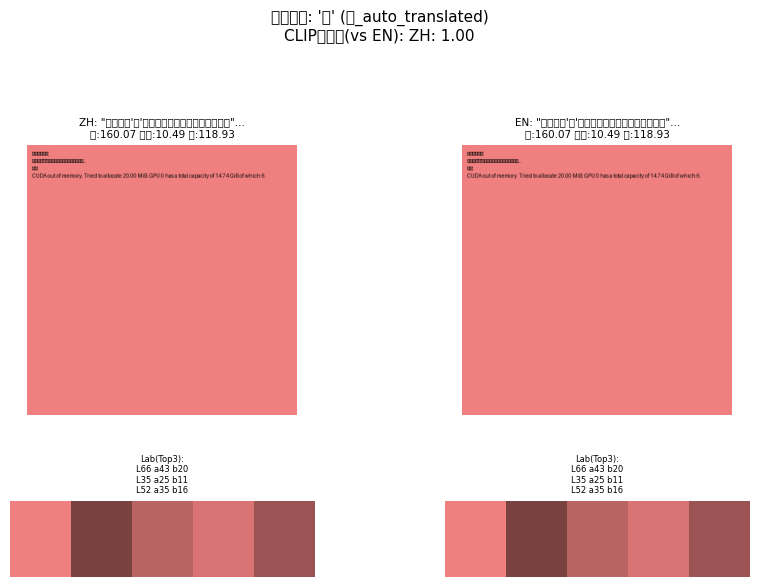

  Ê¶ÇÂøµ 'ÈÖ∑_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #2: 'ÊüîËªü' (ÊüîËªü_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'ÊüîËªü_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'ÊüîËªü'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÊüîËªü'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÊüîËªü„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'ÊüîËªü'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÊüîËªü'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÊüîËªü„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'ÊüîËªü'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 26580 (\N{CJK UNIFIED IDEOGRAPH-67D4}) mi

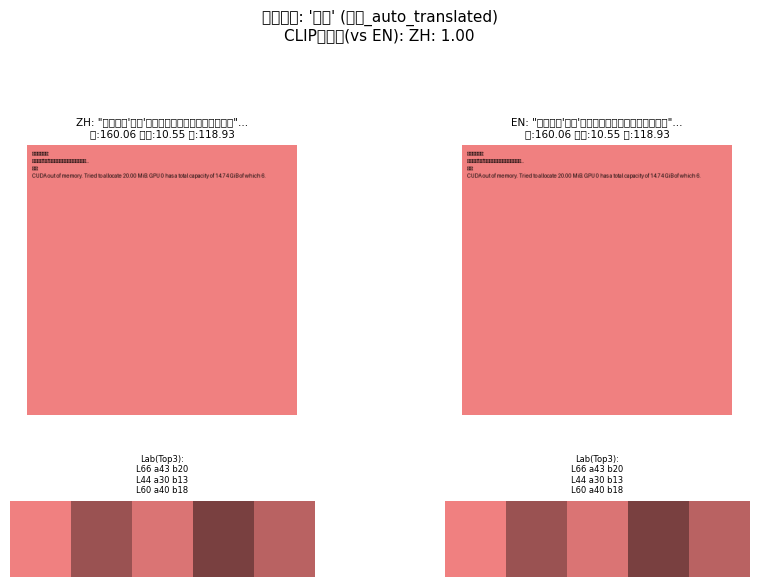

  Ê¶ÇÂøµ 'ÊüîËªü_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #3: 'Êòé‰∫Æ' (Êòé‰∫Æ_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'Êòé‰∫Æ_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'Êòé‰∫Æ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Êòé‰∫Æ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÊòé‰∫Æ„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'Êòé‰∫Æ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Êòé‰∫Æ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÊòé‰∫Æ„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'Êòé‰∫Æ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) mi

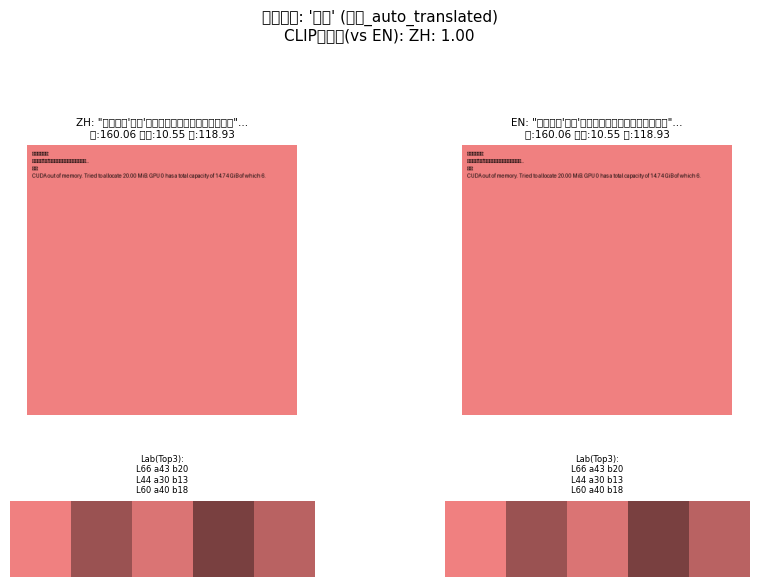

  Ê¶ÇÂøµ 'Êòé‰∫Æ_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #4: 'ÈªëÊöó' (ÈªëÊöó_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'ÈªëÊöó_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'ÈªëÊöó'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÈªëÊöó'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈªëÊöó„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'ÈªëÊöó'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÈªëÊöó'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈªëÊöó„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'ÈªëÊöó'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 40657 (\N{CJK UNIFIED IDEOGRAPH-9ED1}) mi

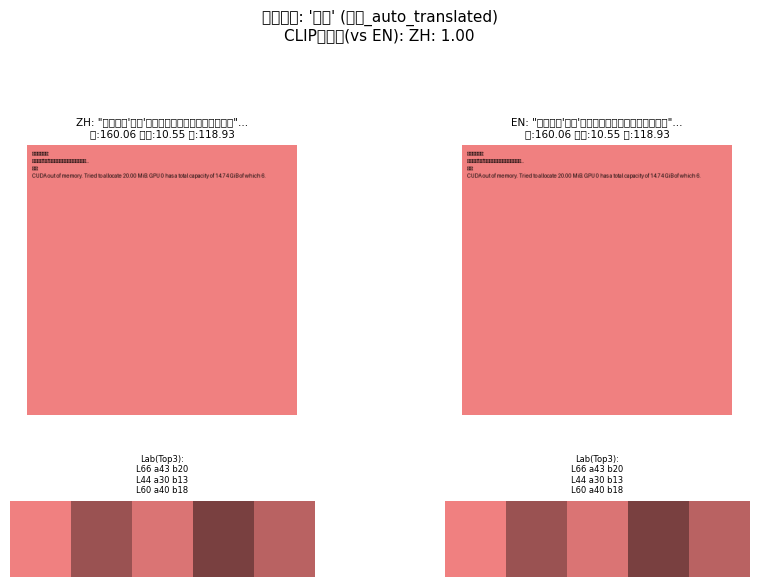

  Ê¶ÇÂøµ 'ÈªëÊöó_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #5: 'Á¥îÊΩî' (Á¥îÊΩî_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'Á¥îÊΩî_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'Á¥îÊΩî'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Á¥îÊΩî'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÁ¥îÊΩî„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'Á¥îÊΩî'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Á¥îÊΩî'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÁ¥îÊΩî„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'Á¥îÊΩî'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32020 (\N{CJK UNIFIED IDEOGRAPH-7D14}) mi

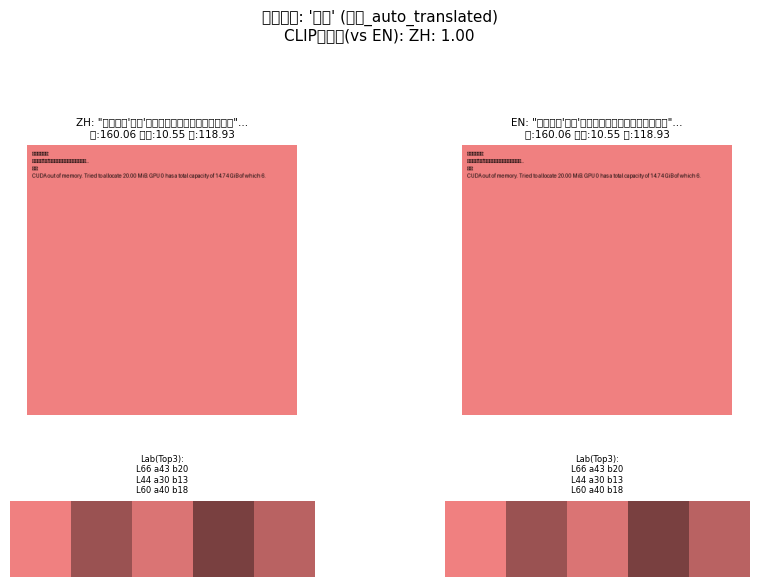

  Ê¶ÇÂøµ 'Á¥îÊΩî_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #6: 'Ê∫´Êöñ' (Ê∫´Êöñ_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'Ê∫´Êöñ_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'Ê∫´Êöñ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Ê∫´Êöñ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÊ∫´Êöñ„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'Ê∫´Êöñ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Ê∫´Êöñ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÊ∫´Êöñ„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'Ê∫´Êöñ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 28331 (\N{CJK UNIFIED IDEOGRAPH-6EAB}) mi

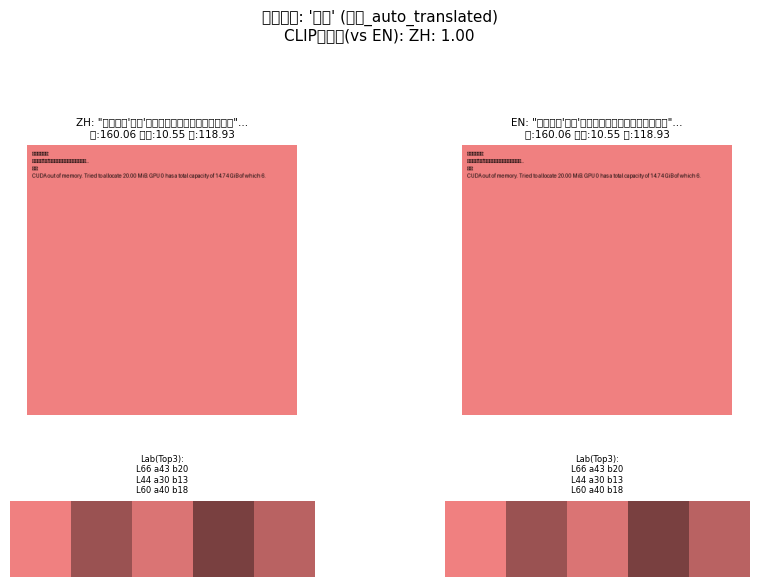

  Ê¶ÇÂøµ 'Ê∫´Êöñ_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #7: 'Âø´Ê®Ç' (Âø´Ê®Ç_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'Âø´Ê®Ç_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'Âø´Ê®Ç'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Âø´Ê®Ç'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÂø´Ê®Ç„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'Âø´Ê®Ç'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Âø´Ê®Ç'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÂø´Ê®Ç„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'Âø´Ê®Ç'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24555 (\N{CJK UNIFIED IDEOGRAPH-5FEB}) mi

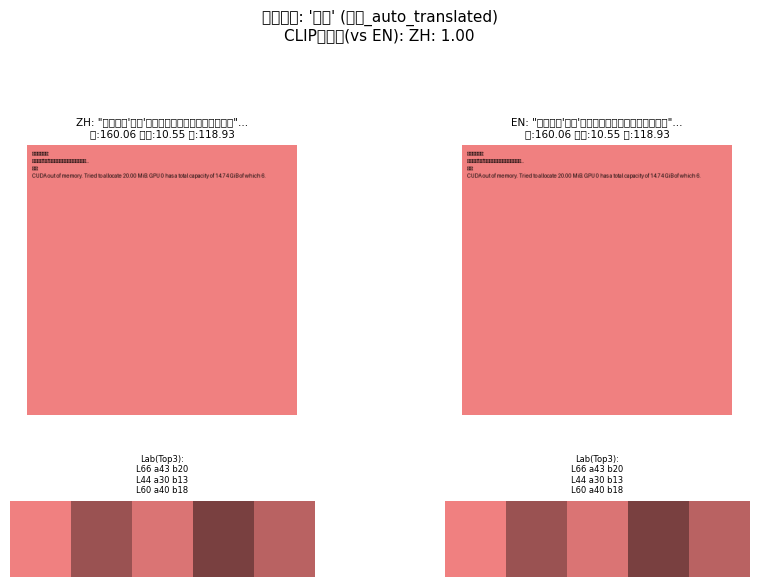

  Ê¶ÇÂøµ 'Âø´Ê®Ç_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #8: 'ÁîüÊ∞£' (ÁîüÊ∞£_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'ÁîüÊ∞£_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'ÁîüÊ∞£'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÁîüÊ∞£'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÁîüÊ∞£„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'ÁîüÊ∞£'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÁîüÊ∞£'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÁîüÊ∞£„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'ÁîüÊ∞£'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) mi

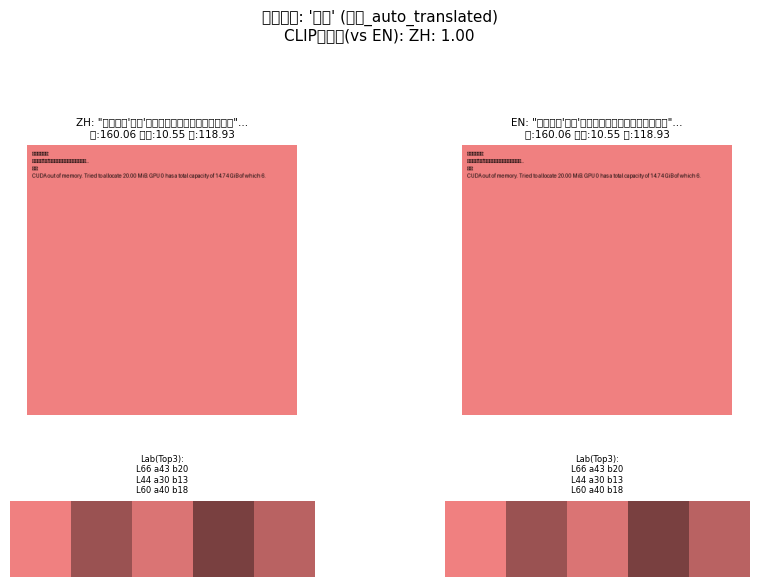

  Ê¶ÇÂøµ 'ÁîüÊ∞£_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #9: 'ÂÇ∑ÂøÉ' (ÂÇ∑ÂøÉ_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'ÂÇ∑ÂøÉ_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'ÂÇ∑ÂøÉ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÂÇ∑ÂøÉ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÂÇ∑ÂøÉ„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'ÂÇ∑ÂøÉ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'ÂÇ∑ÂøÉ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÂÇ∑ÂøÉ„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'ÂÇ∑ÂøÉ'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 20663 (\N{CJK UNIFIED IDEOGRAPH-50B7}) mi

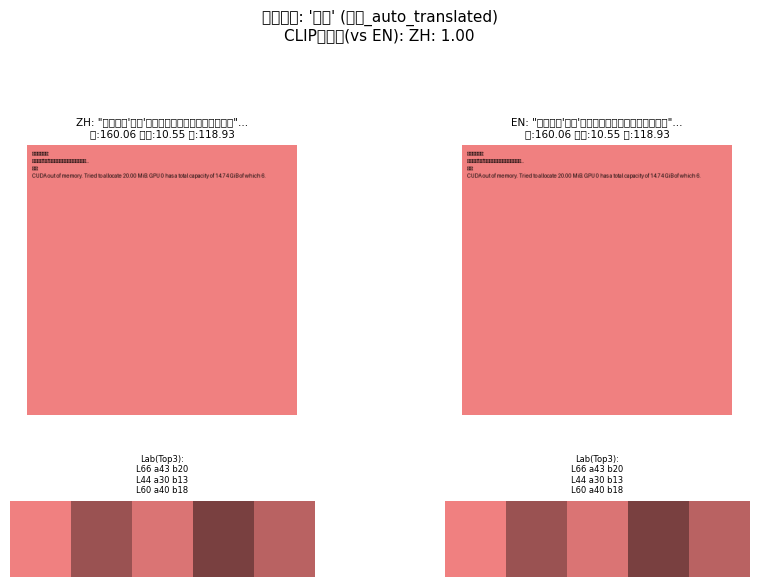

  Ê¶ÇÂøµ 'ÂÇ∑ÂøÉ_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #10: 'È©öË®ù' (È©öË®ù_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'È©öË®ù_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'È©öË®ù'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'È©öË®ù'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈ©öË®ù„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'È©öË®ù'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'È©öË®ù'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈ©öË®ù„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'È©öË®ù'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 39514 (\N{CJK UNIFIED IDEOGRAPH-9A5A}) mi

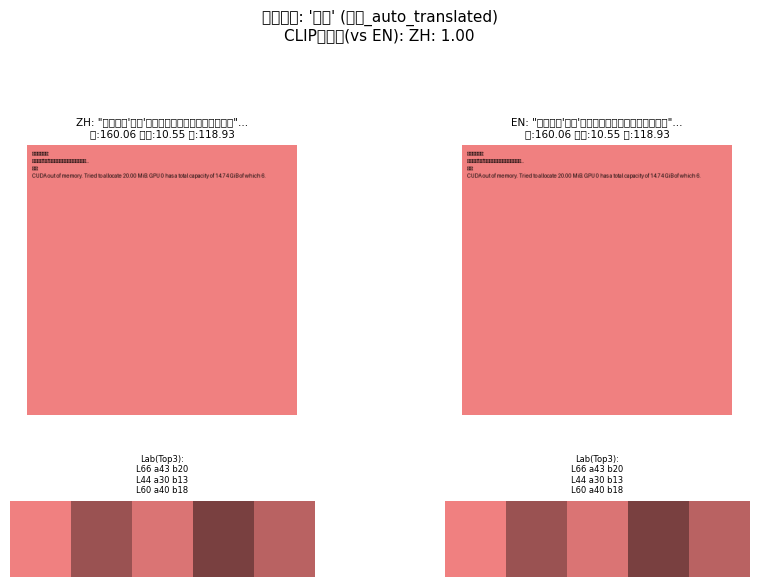

  Ê¶ÇÂøµ 'È©öË®ù_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #11: 'È§ì' (È§ì_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'È§ì_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'È§ì'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'È§ì'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈ§ì„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'È§ì'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #7a4141, #ba6363 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.07, Â∞çÊØîÂ∫¶=10.49, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñË¶∫È¢®Ê†º

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'È§ì'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÈ§ì„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'È§ì'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #7a4141, #ba6363 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.07, Â∞çÊØîÂ∫¶=10.49, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñË¶∫È¢®Ê†º

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 39187 (\N{CJK UNIFIED IDEOGRAPH-9913}) mi

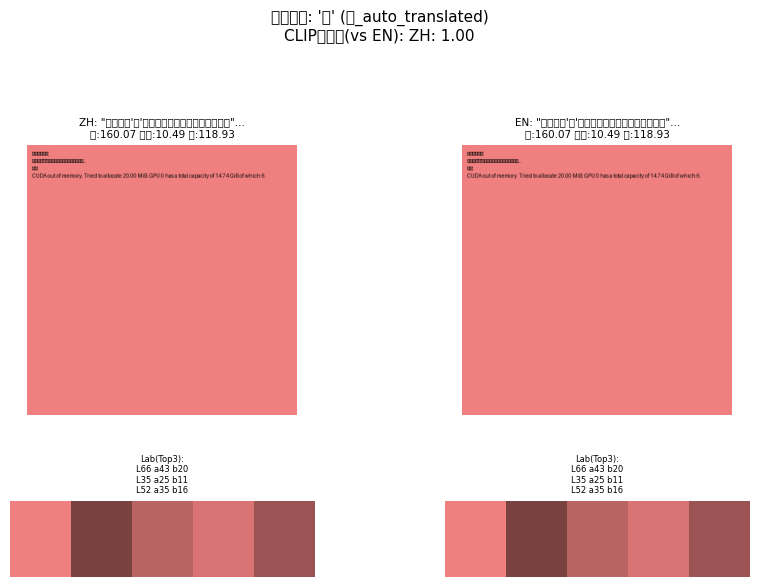

  Ê¶ÇÂøµ 'È§ì_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ËôïÁêÜÊ¶ÇÂøµ #12: 'Áñ≤ÊÜä' (Áñ≤ÊÜä_auto_translated)
  [1. CLIPÂµåÂÖ•ÂàÜÊûê]
  CLIPÊñáÊú¨ÂµåÂÖ•ÂêëÈáèÈ§òÂº¶Áõ∏‰ººÂ∫¶ (vs 'EN'):
    - Ëàá ZH: 1.000
  [2. ÂúñÂÉèÁîüÊàê„ÄÅÈ°èËâ≤ËàáÂÖ®Â±ÄÁâπÂæµÂàÜÊûê]


  'Áñ≤ÊÜä_auto_translated'Ë™ûË®ÄËôïÁêÜ:   0%|          | 0/2 [00:00<?, ?it/s]

    -> ZH: '‰∏ÄÂºµÊèèÁπ™'Áñ≤ÊÜä'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç'


  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Áñ≤ÊÜä'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÁñ≤ÊÜä„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêZH: ‰∏ÄÂºµÊèèÁπ™'Áñ≤ÊÜä'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

  0%|          | 0/20 [00:00<?, ?it/s]

  ÁîüÊàêÂúñÂÉèÊôÇÂá∫ÈåØ ('‰∏ÄÂºµÊèèÁπ™'Áñ≤ÊÜä'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...'): CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 6.12 MiB is free. Process 14267 has 14.73 GiB memory in use. Of the allocated memory 14.55 GiB is allocated by PyTorch, and 50.19 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

--- Ëß£ÈáãÊ®°Êùø for Ê¶ÇÂøµ:„ÄêÁñ≤ÊÜä„Äë| Ë™ûË®ÄÊèêÁ§∫: „ÄêEN: ‰∏ÄÂºµÊèèÁπ™'Áñ≤ÊÜä'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç...„Äë ---
ÂúñÂÉè‰∏ªË¶ÅËâ≤Á•® (HEX): #f08080, #9a5252, #da7474 ...
ÂÖ®Â±ÄÂúñÂÉèÁâπÂæµ: ‰∫ÆÂ∫¶=160.06, Â∞çÊØîÂ∫¶=10.55, È£ΩÂíåÂ∫¶=118.93

ÂéüÂõ†Êé®Ê∏¨ËàáÂúñÂÉèÊèèËø∞ (Ë´ãÊÇ®Â°´ÂÖÖ)Ôºö
   [Ë´ãÁµêÂêà‰ª•‰∏äÂÆ¢ËßÄÊåáÊ®ôÂíåÊÇ®ÁöÑËßÄÂØüÔºåË©≥Á¥∞Èó°Ëø∞Ôºö
    a. ÂúñÂÉèË¶ñ

<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 25551 (\N{CJK UNIFIED IDEOGRAPH-63CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 32362 (\N{CJK UNIFIED IDEOGRAPH-7E6A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94]); plt.subplots_adjust(hspace=0.5, wspace=0.3); plt.show()
<ipython-input-37-31a4d00cce96>:65: UserWarning: Glyph 30130 (\N{CJK UNIFIED IDEOGRAPH-75B2}) mi

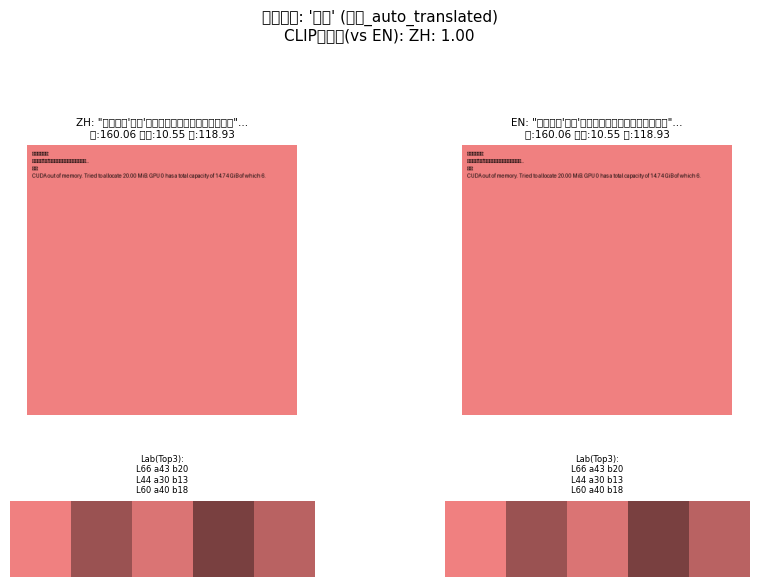

  Ê¶ÇÂøµ 'Áñ≤ÊÜä_auto_translated' ÂàÜÊûêÂÆåÁï¢„ÄÇ


ÊâÄÊúâË©ûÂΩôÊ¶ÇÂøµËôïÁêÜÂÆåÊàêÔºÅËß£ÈáãÊ®°ÊùøÂ∑≤Âú®‰∏äÊñπÊâìÂç∞„ÄÇ
Ê≠£Âú®Ê∏ÖÁêÜÊ®°ÂûãË≥áÊ∫ê...
  Ê®°ÂûãÂíåË≥áÊ∫êÊ∏ÖÁêÜÊìç‰ΩúÂ∑≤Âü∑Ë°å„ÄÇ
ËÖ≥Êú¨Âü∑Ë°åÂÆåÁï¢„ÄÇ


In [ ]:
# ‰∏ªÂü∑Ë°åÊµÅÁ®ã
if __name__ == '__main__':
    # 1. ÂàùÂßãÂåñÈÖçÁΩÆÁÆ°ÁêÜÂô®
    config_mgr = ConfigManager()

    # 2. ÂàùÂßãÂåñÊ®°ÂûãÁÆ°ÁêÜÂô®
    model_mgr = ModelManager(device=config_mgr.device, hf_device_id=config_mgr.hf_device_id)
    clip_model, _ = model_mgr.load_clip_model()
    sd_pipeline = model_mgr.load_sd_model()
    translation_pipelines = model_mgr.init_translation_models(target_languages=['en', 'ja', 'ko'])

    # 3. ÂàùÂßãÂåñÊï∏ÊìöÊèê‰æõËÄÖÔºå‰∏¶Ê∏ÖÁ©∫È†êË®≠Ê¶ÇÂøµ
    concept_provider = ConceptDataProvider(clear_default_concepts=True)

    # ÂÆöÁæ©‰Ω†ÊÉ≥Ë¶ÅËá™ÂãïÁøªË≠ØÂíåÂàÜÊûêÁöÑ‰∏≠ÊñáË©ûÂΩôÂàóË°®
    chinese_terms_to_analyze = [
        "ÈÖ∑",
        "ÊüîËªü",
        "Êòé‰∫Æ",
        "ÈªëÊöó",
        "Á¥îÊΩî",
        "Ê∫´Êöñ",
        "Âø´Ê®Ç",
        "ÁîüÊ∞£",
        "ÂÇ∑ÂøÉ",
        "È©öË®ù",
        "È§ì",
        "Áñ≤ÊÜä"
    ]

    print(f"\n--- ÈñãÂßãÁÇ∫Áî®Êà∂ÂÆöÁæ©ÁöÑ {len(chinese_terms_to_analyze)} ÂÄãË©ûÂΩôÊ∑ªÂä†Ê¶ÇÂøµ ---")
    if not any(translation_pipelines.values()):
        print("Ë≠¶ÂëäÔºöÊ≤íÊúâÂèØÁî®ÁöÑÁøªË≠ØÊ®°ÂûãÔºåÂ∞á‰∏ªË¶Å‰ΩøÁî®‰∏≠ÊñáÂéüÊñá‰ΩúÁÇ∫ÊèêÁ§∫„ÄÇ")

    for term_index, term_input in enumerate(chinese_terms_to_analyze):
        core_chinese_word = ""
        chinese_description = None

        if isinstance(term_input, str):
            core_chinese_word = term_input
            chinese_description = f"‰∏ÄÂºµÊèèÁπ™'{term_input}'ÁöÑÂúñÁâáÔºåÂ±ïÁèæÂÖ∂ÂÖ∏ÂûãÁâπÂæµÂíåÊ∞õÂúç"
        elif isinstance(term_input, tuple) and len(term_input) == 2:
            core_chinese_word = term_input[0]
            chinese_description = term_input[1]
        else:
            print(f"Ë∑≥ÈÅéÁÑ°ÊïàÁöÑËº∏ÂÖ•Ê†ºÂºè: {term_input}")
            continue

        print(f"  ËôïÁêÜËº∏ÂÖ• #{term_index + 1}: Ê†∏ÂøÉË©û='{core_chinese_word}', ÊèèËø∞='{chinese_description}'")
        concept_provider.add_concept_with_auto_translation(
            translation_pipelines=translation_pipelines,
            base_chinese=core_chinese_word,
            chinese_description_for_prompt=chinese_description,
            target_languages=['en', 'ja', 'ko']
        )
    print("--- Áî®Êà∂ÂÆöÁæ©Ë©ûÂΩôÊ¶ÇÂøµÊ∑ªÂä†ÂÆåÊàê ---")

    # 4. ÂàùÂßãÂåñÂàÜÊûêÊµÅÁ®ãÊâÄÈúÄÊ®°ÁµÑ
    text_analyzer = TextAnalyzer(clip_model=clip_model, device=config_mgr.device)
    image_processor = ImageProcessor(sd_pipeline=sd_pipeline, device=config_mgr.device)
    report_generator = ReportGenerator()

    # Âª∫Á´ãÂàÜÊûêÊµÅÁ®ãÁÆ°Á∑öÔºà‰øÆÊ≠£ÈÄôË£°ÁöÑËÆäÊï∏ÂêçÁ®±Ôºâ
    analysis_pipeline = AnalysisPipeline(
        config_manager=config_mgr,
        model_manager=model_mgr,
        concept_provider=concept_provider,
        text_analyzer=text_analyzer,
        image_processor=image_processor,
        report_generator=report_generator
    )

    # 5. Âü∑Ë°åÂàÜÊûêÊµÅÁ®ã
    if not concept_provider.get_concepts_to_process():
        print("Ê≤íÊúâ‰ªª‰ΩïÊ¶ÇÂøµË¢´ÂÆöÁæ©ÔºåÁÑ°Ê≥ïÂü∑Ë°åÂàÜÊûêÊµÅÁ®ã„ÄÇË´ãÊ™¢Êü• `chinese_terms_to_analyze`„ÄÇ")
    else:
        all_results = analysis_pipeline.run_analysis()
        # ÈÄôË£°ÂèØ‰ª•Ê†πÊìöÈúÄË¶ÅËº∏Âá∫ÊàñÂÑ≤Â≠ò all_results

    # 6. Ê∏ÖÁêÜË≥áÊ∫ê
    model_mgr.cleanup()

    print("ËÖ≥Êú¨Âü∑Ë°åÂÆåÁï¢„ÄÇ")
